In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 

In [3]:
# load the data

data = pd.read_csv(r"C:\Users\Charles lf\Desktop\data\data_05\bank.csv")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# basic data info
df=data.copy()
print(df.shape)
print(df.dtypes.value_counts())
print(df.info())

(11162, 17)
object    10
int64      7
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [6]:
# verify the missing value

print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<AxesSubplot:>

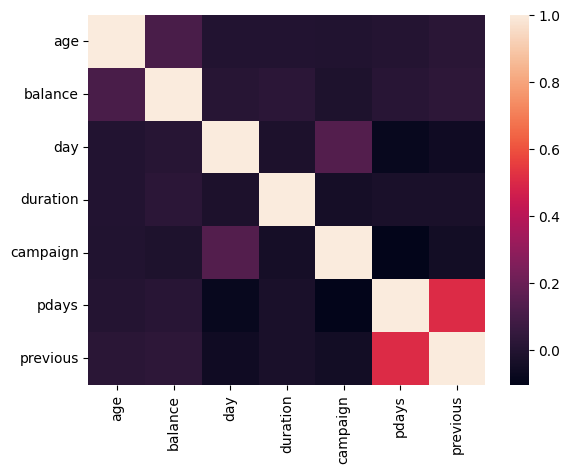

In [7]:
#  the correlation

plt.figure()
sns.heatmap(df.corr())

In [11]:
# the ovject variables

for col in df.select_dtypes('object'):
    print(f'{col :-<50}, {df[col].unique()}')

job-----------------------------------------------, ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital-------------------------------------------, ['married' 'single' 'divorced']
education-----------------------------------------, ['secondary' 'tertiary' 'primary' 'unknown']
default-------------------------------------------, ['no' 'yes']
housing-------------------------------------------, ['yes' 'no']
loan----------------------------------------------, ['no' 'yes']
contact-------------------------------------------, ['unknown' 'cellular' 'telephone']
month---------------------------------------------, ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome------------------------------------------, ['unknown' 'other' 'failure' 'success']
deposit-------------------------------------------, ['yes' 'no']


In [15]:
# varaible encoding 

code={

    "admin.":0,
    "technician":1,
    "services":2,
    "management":3,
    "retired":4,
    "blue-collar":5,
    "unemployed":6,
    "entrepreneur":7,
    "housemaid":8,
    "unknown":9,
    "self-employed":10,
    "student":11,
    "married":0,
    "single":1,
    "divorced":2,
    "secondary":0,
    "tertiary":1,
    "primary":2,
    "no":0,
    "yes":1,
    "cellular":0,
    "telephone":1,
    "jan":0,
    "feb":1,
    "mar":2,
    "apr":3,
    "may":4,
    "jun":5,
    "jul":6,
    "aug":7,
    "sep":8,
    "oct":9,
    "nov":10,
    "dec":11,
    "failure":0,
    "success":1,
    "other":2,
}

# test dataset
df_01=df.copy()

for col in df.select_dtypes("object"):
    df[col]=df[col].map(code)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,1,0,9,5,4,1042,1,-1,0,9,1
1,56,0,0,0,0,45,0,0,9,5,4,1467,1,-1,0,9,1
2,41,1,0,0,0,1270,1,0,9,5,4,1389,1,-1,0,9,1
3,55,2,0,0,0,2476,1,0,9,5,4,579,1,-1,0,9,1
4,54,0,0,1,0,184,0,0,9,5,4,673,2,-1,0,9,1


In [17]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

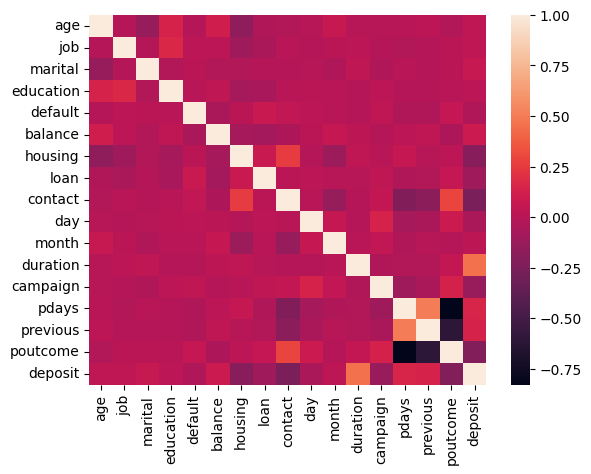

In [18]:
# check correlation again
sns.heatmap(df.corr())

In [20]:
# the preprocessing

from sklearn.model_selection import train_test_split

trainest, testset = train_test_split(df, test_size=0.2, random_state=12)

In [21]:
trainest.shape

(8929, 17)

In [22]:
testset.shape

(2233, 17)

In [31]:
def split(df):
    X=df.drop('age', axis=1)
    y=df['age']
    return X,y


X_train, y_train= split(trainest)
print(X_train)

X_test, y_test=split(testset)

      job  marital  education  default  ...  pdays  previous  poutcome  deposit
76      1        0          1        0  ...     -1         0         9        1
9757    1        1          1        0  ...     -1         0         9        0
9387    4        0          0        0  ...    357         8         2        0
3356    3        1          1        0  ...     -1         0         9        1
1906    1        0          0        0  ...     -1         0         9        1
...   ...      ...        ...      ...  ...    ...       ...       ...      ...
3714    1        1          0        0  ...     -1         0         9        1
7409    7        0          2        0  ...     -1         0         9        0
3325    3        0          9        0  ...    154         3         1        1
9606    1        0          0        0  ...     -1         0         9        0
5787    2        0          0        0  ...     -1         0         9        0

[8929 rows x 16 columns]


In [40]:
# modeleling

def the_model():
    inputs=keras.Input(shape=(16))
    x=layers.Dense(32, activation='relu')(inputs)
    x=layers.BatchNormalization()(x)
    x=layers.Dense(64, activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x=layers.Dense(128, activation='relu')(x)
    outputs=layers.Dense(1, activation='relu')(x)

    model=keras.Model(inputs=inputs, outputs=outputs)

    return model



model = the_model()

print(model.summary())

model.compile(
    loss='mean_absolute_error',
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
)

model.fit(X_train, y_train, epochs=100, verbose=2, batch_size=32 )



model.evaluate(X_test,y_test, batch_size=32, verbose=2)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_32 (Dense)            (None, 32)                544       
                                                                 
 batch_normalization_17 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_18 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 128)               8320

9.321897506713867

In [41]:
model.predict(X_test[:20])

1/1 [==============================] - 0s 411ms/step


array([[101.56839 ],
       [ 39.391785],
       [ 37.74883 ],
       [ 38.56435 ],
       [ 35.881577],
       [ 36.86236 ],
       [ 41.221565],
       [ 36.894512],
       [ 44.91765 ],
       [ 39.397453],
       [ 41.81736 ],
       [ 38.263348],
       [ 39.13311 ],
       [ 39.992386],
       [ 36.92962 ],
       [ 42.5791  ],
       [ 33.370186],
       [ 43.06473 ],
       [ 46.32112 ],
       [ 42.532333]], dtype=float32)

In [47]:
y_test[:20]

6010     49
4059     44
7624     54
5145     33
2276     28
2521     36
4056     49
8408     42
4029     48
9184     29
1349     58
6943     40
2688     41
10000    34
9548     27
9391     34
5190     27
2340     83
9216     56
8910     59
Name: age, dtype: int64